In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
titanic_df=pd.read_csv("titanic_train.csv")

# Finding the insights from the dataset what it consist of

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#finding the numbers of rows and columns present in the dataset
titanic_df.shape

(891, 12)

In [6]:
#finding the category of passenger travelling
titanic_df.Pclass.unique()



array([3, 1, 2], dtype=int64)

In [7]:
#finding the different values present in 'Embarked' column
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

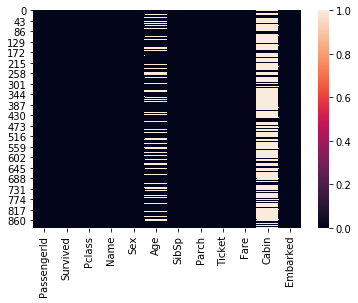

In [8]:
#checking wether the dataset consist of null or nan values
sns.heatmap(titanic_df.isnull())

In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#there are null values present in three columns i.e. 'cabin' 'Embarked' and 'Age'

#removing the null values

In [11]:
#taking out the mean of the age column and replacing it with null values
meaan=titanic_df['Age'].mean()
titanic_df['Age']=titanic_df['Age'].fillna(meaan)

In [12]:
#finding the most occured cabin in the dataset and replacing it with null values 
modde=titanic_df.Cabin.mode()
print(modde)
titanic_df['Cabin']=titanic_df['Cabin'].fillna(modde[0])

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [13]:
#finding the most occured value in the dataset and replacing it with null values
mod=titanic_df.Embarked.mode()
print(mod)
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mod[0])

0    S
dtype: object


In [14]:
#checking the change in the datset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [15]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,B96 B98,Q


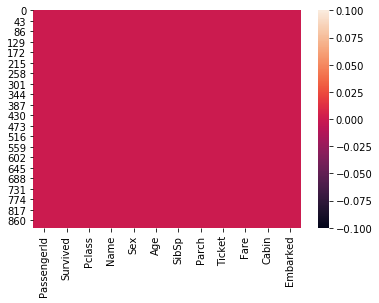

In [16]:
#recheking for null values
sns.heatmap(titanic_df.isnull())

In [17]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER' 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb=LabelEncoder()
lb.fit(titanic_df['Sex'])
lb.classes_

array(['female', 'male'], dtype=object)

In [20]:
titanic_df['Sex']=lb.fit_transform(titanic_df['Sex'])

In [21]:
titanic_df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [22]:
lb.fit(titanic_df['Embarked'])
lb.classes_

array(['C', 'Q', 'S'], dtype=object)

In [23]:
titanic_df['Embarked']=lb.fit_transform(titanic_df['Embarked'])

# Bivariate Analysis

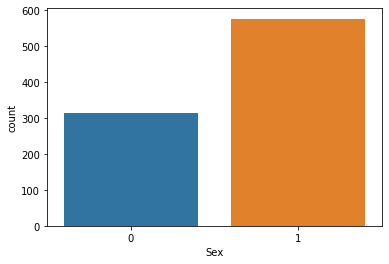

In [24]:
sns.countplot(x='Sex',data=titanic_df)

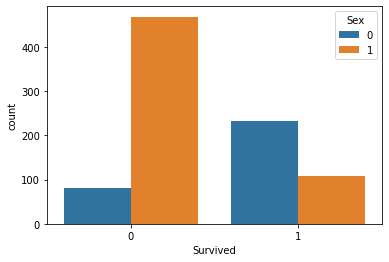

In [25]:
sns.countplot(x='Survived', hue ='Sex', data=titanic_df)

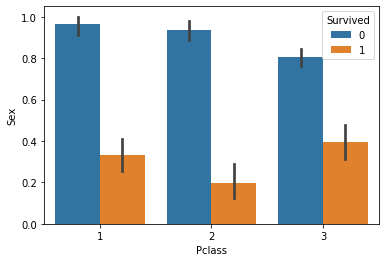

In [26]:
sns.barplot(titanic_df['Pclass'],titanic_df['Sex'],titanic_df['Survived'])

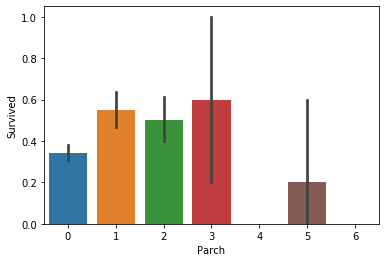

In [27]:
sns.barplot(x='Parch',y='Survived', data=titanic_df)

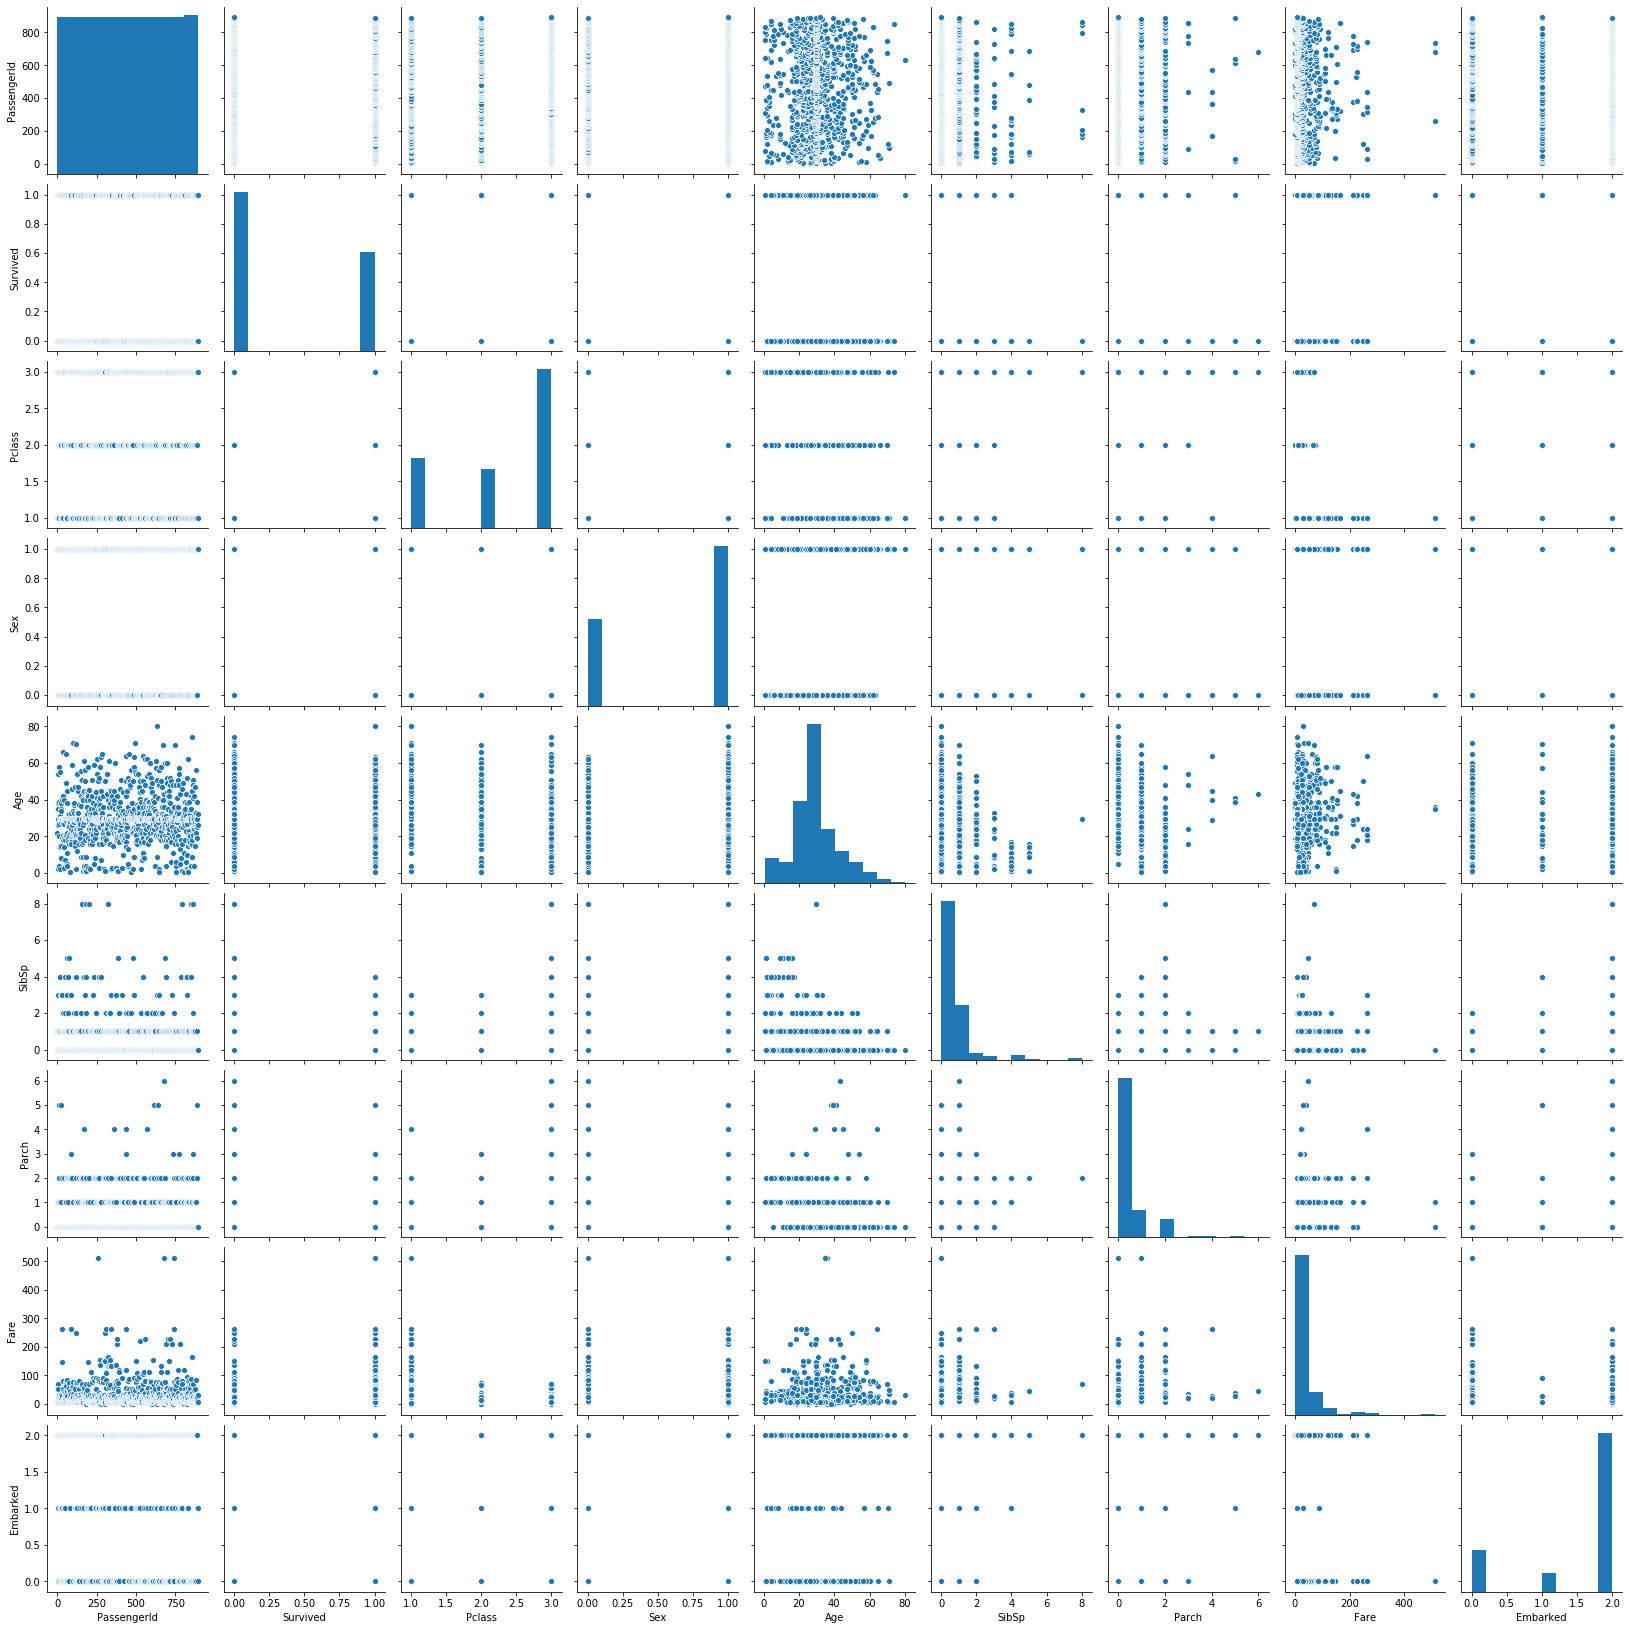

In [28]:
sns.pairplot(titanic_df)

# Univariate Analysis

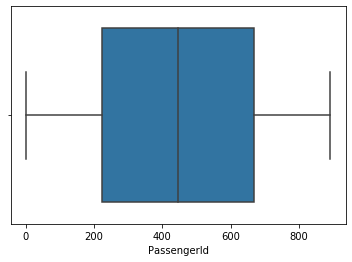

In [29]:
sns.boxplot(titanic_df['PassengerId'])

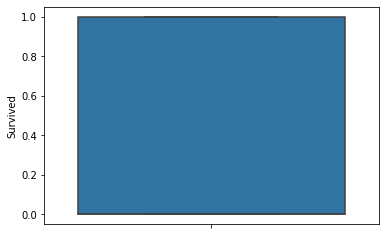

In [30]:
sns.boxplot(titanic_df['Survived'],orient='v')

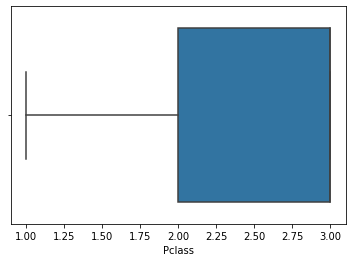

In [31]:
sns.boxplot(titanic_df['Pclass'])

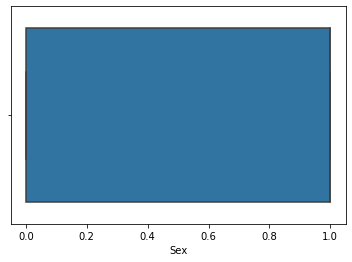

In [32]:
sns.boxplot(titanic_df['Sex'])

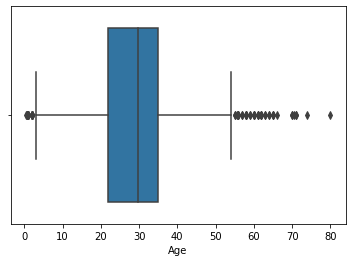

In [33]:
sns.boxplot(titanic_df['Age'])

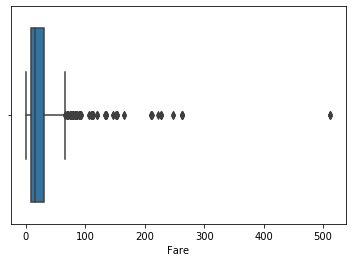

In [34]:
sns.boxplot(titanic_df['Fare'])

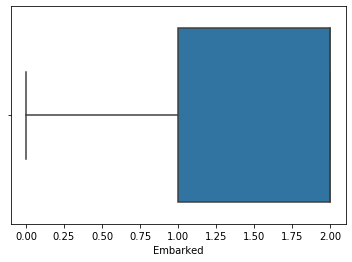

In [35]:
sns.boxplot(titanic_df['Embarked'])

In [36]:
#dropping the 'name' 'passengerid' 'Cabin' and 'ticket' column as it is of no use in dataset
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

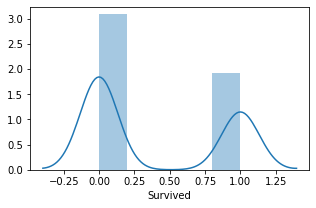

In [37]:
#checking Skewness
plt.figure(figsize=(5,3))
sns.distplot(titanic_df['Survived'])

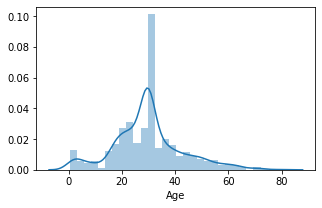

In [38]:
plt.figure(figsize=(5,3))
sns.distplot(titanic_df['Age'])

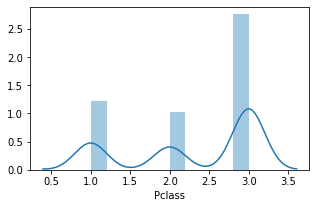

In [39]:
plt.figure(figsize=(5,3))
sns.distplot(titanic_df['Pclass'])

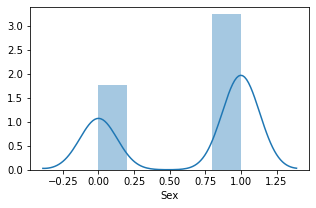

In [40]:
plt.figure(figsize=(5,3))
sns.distplot(titanic_df['Sex'])

In [41]:
titanic_df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [42]:
#we can say that there is some skewness present in the dataset 

# Statistical Analysis

In [43]:
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [44]:
titanic_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


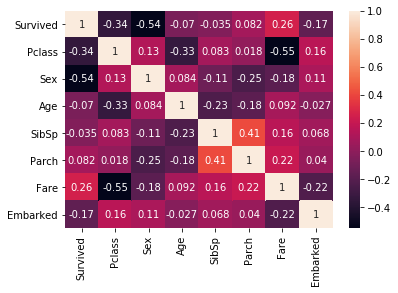

In [45]:
sns.heatmap(titanic_df.corr(),annot=True)

# Removing Outliers and skewness

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(titanic_df))
z
print("skewness before the the outliers are removed")
print(titanic_df.skew())

skewness before the the outliers are removed
Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64


In [47]:
threshold=3

In [48]:
#printing all the values which are greater than the threshold value
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [49]:
z[96][4] #checking wether the result is correct or not

0.47454519624983954

In [50]:
titanic_new=titanic_df[(z<3).all(axis=1)] #removing the outliers 

In [51]:
#checking skewness after removing the outliers
titanic_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [52]:
#removing skewness using np.sqrt
#treating skewed data
collist=titanic_new.columns.values
for i in range(0,len(collist)):
    if titanic_new.skew().loc[collist[i]]>0.55:
        titanic_new[collist[i]]=np.sqrt(titanic_new[collist[i]])


In [53]:
titanic_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.136758
Parch       1.723351
Fare        1.350428
Embarked   -1.277386
dtype: float64

In [54]:
titanic_new.shape 

(820, 8)

In [55]:
titanic_df.shape

(891, 8)

we have 820 rows left after removing the outliers

# Splitting The data into training and testing sets

In [57]:
titanic_df=titanic_new

In [58]:
titanic_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [59]:
y=titanic_df['Survived']

In [60]:
titanic_df.drop(['Survived','Parch'],axis=1,inplace=True)

In [61]:
x=titanic_df.iloc[:,:]

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,22.0,1.0,2.692582,2
1,1,0,38.0,1.0,8.442944,0
2,3,0,26.0,0.0,2.815138,2
3,1,0,35.0,1.0,7.286975,2
4,3,1,35.0,0.0,2.837252,2


In [85]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [86]:
#Finding the best random state

In [87]:

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)



Accuracy SCORE is equal to : 0.823170731707317 at random state 42
Accuracy SCORE is equal to : 0.8079268292682927 at random state 43
Accuracy SCORE is equal to : 0.7987804878048781 at random state 44
Accuracy SCORE is equal to : 0.7378048780487805 at random state 45
Accuracy SCORE is equal to : 0.8201219512195121 at random state 46
Accuracy SCORE is equal to : 0.8109756097560976 at random state 47
Accuracy SCORE is equal to : 0.7957317073170732 at random state 48
Accuracy SCORE is equal to : 0.7926829268292683 at random state 49
Accuracy SCORE is equal to : 0.8140243902439024 at random state 50
Accuracy SCORE is equal to : 0.7804878048780488 at random state 51
Accuracy SCORE is equal to : 0.7713414634146342 at random state 52
Accuracy SCORE is equal to : 0.7896341463414634 at random state 53
Accuracy SCORE is equal to : 0.7774390243902439 at random state 54
Accuracy SCORE is equal to : 0.7469512195121951 at random state 55
Accuracy SCORE is equal to : 0.7896341463414634 at random state

In [88]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(492, 6) (328, 6) (492,) (328,)


In [89]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [90]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 1, 'kernel': 'linear'}

In [91]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 1}

In [92]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.823170731707317


CROSS_VAL_SCORE = 0.7878048780487805


ROC_AUC_SCORE = 0.8009171410499683


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.89      0.86       204
           1       0.80      0.71      0.75       124

    accuracy                           0.82       328
   macro avg       0.82      0.80      0.81       328
weighted avg       0.82      0.82      0.82       328



[[182  22]
 [ 36  88]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_featur

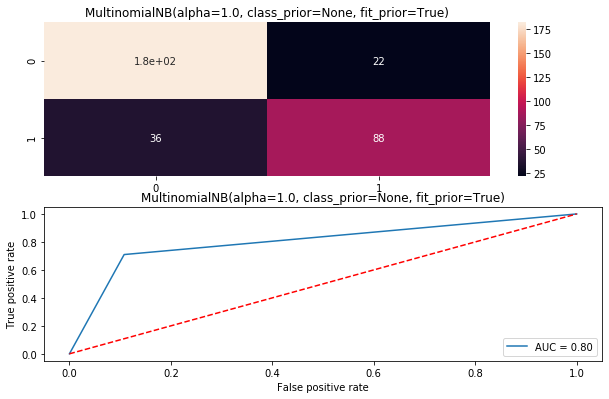

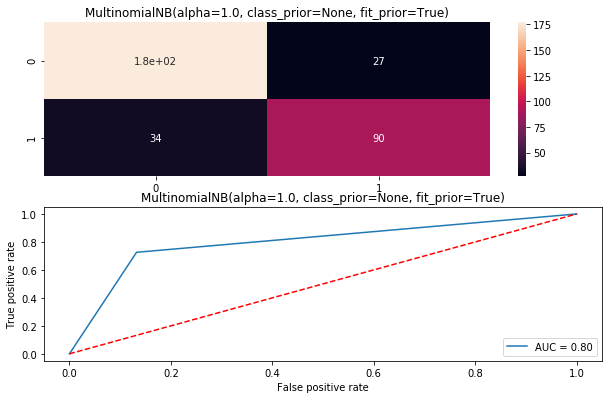

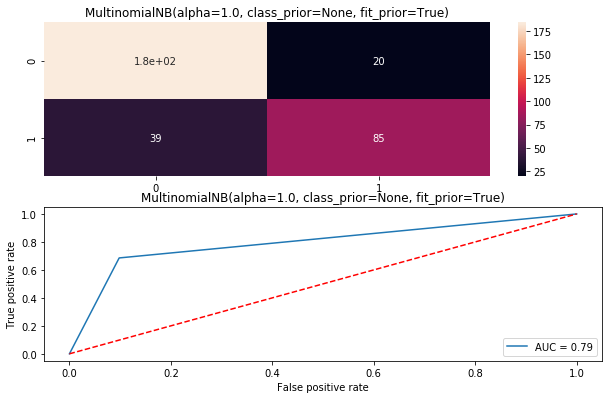

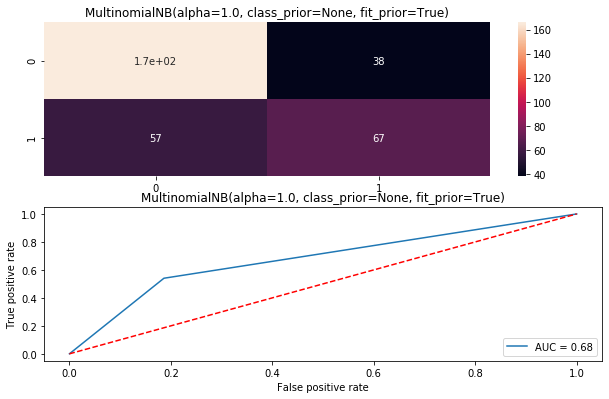

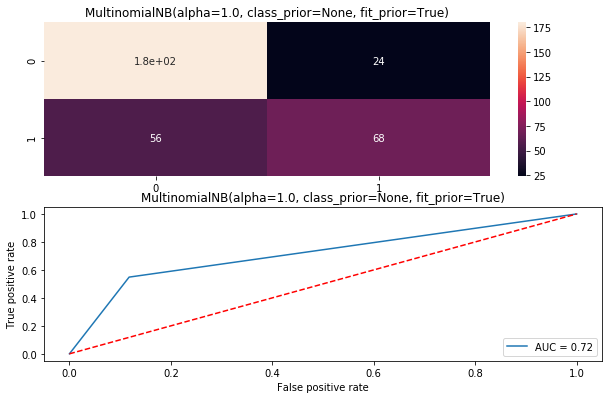

In [102]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='linear'),KNeighborsClassifier(n_neighbors=1),MultinomialNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(name)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [106]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','MultinomialNB'],'Accuracy_Score':[0.823170731707317,0.8140243902439024,0.8201219512195121,0.7103658536585366
, 0.7560975609756098],'Cross_Val_Sore':[0.7878048780487805 ,0.7780487804878049,0.7914634146341464,0.7158536585365853,0.7268292682926829],'Roc_Auc_Score':[0.8009171410499683,0.7967267552182165,0.7937223276407337,0.6770240354206198,0.715370018975332]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.823171,0.787805,0.800917
1,DecisionTreeClassifier,0.814024,0.778049,0.796727
2,SVC,0.820122,0.791463,0.793722
3,KNeighborsClassifier,0.710366,0.715854,0.677024
4,MultinomialNB,0.756098,0.726829,0.715370


In [ ]:
#Hence it is observed that svc is giving a good result, therefore finalizing it

In [109]:
svc=SVC(C=1, kernel='linear')
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8201219512195121
The Cross Val Score = 0.7914634146341464


In [110]:
from sklearn.externals import joblib
joblib.dump(svc,"SVC_Titanic.pkl")

['SVC_Titanic.pkl']